# SLA Breach Prediction

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
import sklearn.metrics as metrics
from sklearn import svm
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df = pd.read_csv("C://Users//appol//OneDrive//Documents//Integrated Experential proj prep//data.csv")
df.head()

,Id,DocumentId,SlaMoment,NumberPages,SugestedDocumentClass,RequestedHumanRevision,QualityControl,CustomerName,EntityName,DocumentMonitorId,FinishedAt,time_diff,DocumentMonitorId.1,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,Breach
0,109524,7c1a7831-96a0-4297-9c96-d2dcf296f294,55:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109524,15:14.3,400.0,109524,2,6,0,4,0,6,No
1,109525,74497e9e-3e13-4a55-b4fc-5dd36621031f,56:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109525,14:58.6,402.0,109525,2,6,0,4,0,6,No
2,109526,51816260-f5cd-45fd-af8c-6dec8184b533,58:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109526,16:41.8,402.0,109526,2,6,0,4,0,6,No
3,109527,002a7749-20eb-495f-a655-a839b2e6b2ec,57:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109527,15:14.4,402.0,109527,2,6,0,4,1,5,No
4,109528,06bda106-5afe-4ae3-88b7-1a11eb7e7bd5,59:00.0,1,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109528,16:05.1,403.0,109528,1,6,0,2,0,6,No


In [4]:
# dimensions of the dataset
df.shape

(38671, 20)

In [5]:
# Check the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38671 entries, 0 to 38670
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      38671 non-null  int64  
 1   DocumentId              38671 non-null  object 
 2   SlaMoment               35576 non-null  object 
 3   NumberPages             38671 non-null  int64  
 4   SugestedDocumentClass   21848 non-null  object 
 5   RequestedHumanRevision  38671 non-null  int64  
 6   QualityControl          38671 non-null  int64  
 7   CustomerName            38671 non-null  object 
 8   EntityName              38671 non-null  object 
 9   DocumentMonitorId       38671 non-null  int64  
 10  FinishedAt              37125 non-null  object 
 11  time_diff               34050 non-null  float64
 12  DocumentMonitorId.1     38671 non-null  int64  
 13  pf_human                38671 non-null  int64  
 14  efv                     38671 non-null

In [6]:
# Columns in the dataset
df.columns

Index(['Id', 'DocumentId', 'SlaMoment', 'NumberPages', 'SugestedDocumentClass',
       'RequestedHumanRevision', 'QualityControl', 'CustomerName',
       'EntityName', 'DocumentMonitorId', 'FinishedAt', 'time_diff',
       'DocumentMonitorId.1', 'pf_human', 'efv', 'pfd_topdown', 'pfd_poised',
       'sfv_human', 'sfv_ML', 'Breach'],
      dtype='object')

In [7]:
# Descriptive statistics
df.describe()

,Id,NumberPages,RequestedHumanRevision,QualityControl,DocumentMonitorId,time_diff,DocumentMonitorId.1,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML
count,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000,34050.000000,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000
mean,128879.507771,1.569471,0.933930,0.066070,128879.507771,540.128899,128879.507771,1.569471,5.183548,0.702697,2.403455,0.937602,4.176618
std,11181.617395,1.596893,0.248408,0.248408,11181.617395,935.276101,11181.617395,1.596893,9.684438,3.618977,1.623856,7.185435,3.080993
min,109524.000000,1.000000,0.000000,0.000000,109524.000000,-4256.000000,109524.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119196.500000,1.000000,1.000000,0.000000,119196.500000,40.000000,119196.500000,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000
50%,128878.000000,1.000000,1.000000,0.000000,128878.000000,245.000000,128878.000000,1.000000,6.000000,0.000000,2.000000,0.000000,5.000000
75%,138545.500000,2.000000,1.000000,0.000000,138545.500000,1015.000000,138545.500000,2.000000,6.000000,0.000000,4.000000,1.000000,6.000000
max,148328.000000,68.000000,1.000000,1.000000,148328.000000,4257.000000,148328.000000,68.000000,792.000000,144.000000,38.000000,646.000000,103.000000


### Data Cleanup

In [8]:
# Check null values 
df.isnull().any()

Id                        False
DocumentId                False
SlaMoment                  True
NumberPages               False
SugestedDocumentClass      True
RequestedHumanRevision    False
QualityControl            False
CustomerName              False
EntityName                False
DocumentMonitorId         False
FinishedAt                 True
time_diff                  True
DocumentMonitorId.1       False
pf_human                  False
efv                       False
pfd_topdown               False
pfd_poised                False
sfv_human                 False
sfv_ML                    False
Breach                    False
dtype: bool

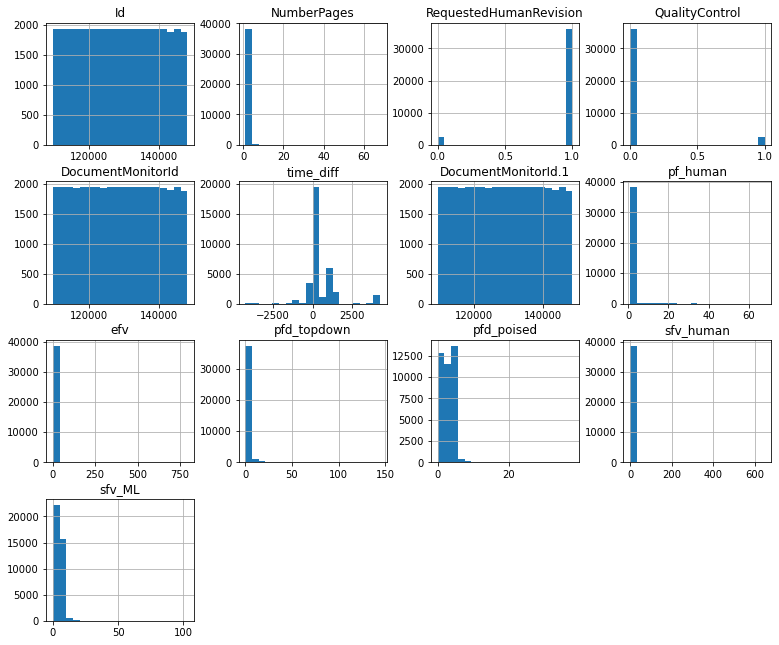

In [9]:
# Check the distribution of varibales in the datafrane
df.hist(figsize=(13,11),bins=20)
plt.show()

In [11]:
# Create our predictor variable using the calculated time difference
df['breach'] = np.where(df['time_diff'] < 0, 1, 0)
df['breach'].value_counts()

0    34558
1     4113
Name: breach, dtype: int64

In [12]:
# Split the document classes into different variables
df[['doc1', 'doc2']] = df['SugestedDocumentClass'].str.split(',', expand = True)
df['isdoc1'] = np.where(df.doc1.isnull(), 0, 1)
df['isdoc2'] = np.where(df.doc2.isnull(), 0, 1)
df['HasMultipleDocumentClass'] = df['isdoc1'] + df['isdoc2']
df.head()

,Id,DocumentId,SlaMoment,NumberPages,SugestedDocumentClass,RequestedHumanRevision,QualityControl,CustomerName,EntityName,DocumentMonitorId,...,pfd_poised,sfv_human,sfv_ML,Breach,doc1,doc2,isdoc1,isdoc2,HasMultipleDocumentClass,breach
0,109524,7c1a7831-96a0-4297-9c96-d2dcf296f294,55:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109524,...,4,0,6,No,dni_front,dni_back,1,1,2,0
1,109525,74497e9e-3e13-4a55-b4fc-5dd36621031f,56:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109525,...,4,0,6,No,dni_front,dni_back,1,1,2,0
2,109526,51816260-f5cd-45fd-af8c-6dec8184b533,58:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109526,...,4,0,6,No,dni_front,dni_back,1,1,2,0
3,109527,002a7749-20eb-495f-a655-a839b2e6b2ec,57:00.0,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109527,...,4,1,5,No,dni_front,dni_back,1,1,2,0
4,109528,06bda106-5afe-4ae3-88b7-1a11eb7e7bd5,59:00.0,1,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109528,...,2,0,6,No,dni_front,dni_back,1,1,2,0


In [13]:
# Check the Entity Name values
df['EntityName'].value_counts()

Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3    21256
Anonymized 11E47A74-96BC-4C87-ADC8-395247A200B8     9783
Anonymized 49428E4C-BA4E-4BAA-B6BA-529CFE4F1D15     2518
Anonymized A48AA76F-A152-491F-A81F-00C31C604153     2040
Anonymized 1A36E27A-D787-4CF4-872E-31E4FC7E5C01     1055
Anonymized 7400E96B-C461-4EC2-B097-CF0BCCEEA164      973
Anonymized 64A2D261-CFA0-4B57-BBF8-542FD2236F21      337
Anonymized 27CE39D3-C4A5-486E-8EAC-2671FB128CFC      304
Anonymized D2A6CA74-7937-48E4-B8EB-C51880B912BA      188
Anonymized 8C7A49F3-AC1F-49BA-8B4A-6472A4211D4E      118
Anonymized 7483B274-A481-4BBB-97C1-E99E74FA7669       45
Anonymized ED4AE7ED-9B5C-455B-9EED-7FE918F46423       33
Anonymized B53A8FF3-52F9-4378-B13E-573CF9BC3471       13
Anonymized 643914C6-45A3-4D12-A2FA-63EF042D57EF        3
Anonymized E2EFBAB6-F238-4A49-AC1F-7A07CBBDCF33        2
Anonymized 3CBCB459-DAA7-4B18-B1A6-C0F7FB5A899E        2
Anonymized FB65ABCB-ADE7-4C63-962F-1557B53ADC42        1
Name: EntityName, dtype: int64

In [14]:
# Categorize the entity names into four.
df['EntityName'] = np.where(df['EntityName'] == 'Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3', 'ent1', 
         np.where(df['EntityName'] == 'Anonymized 11E47A74-96BC-4C87-ADC8-395247A200B8', 'ent2', 
                 np.where(df['EntityName'] == 'Anonymized 49428E4C-BA4E-4BAA-B6BA-529CFE4F1D15', 'ent3', 'ent4')))

In [15]:
# Remove the unwanted columns from the dataframe
df = df.drop(['Id', 'DocumentId', 'DocumentMonitorId', 'FinishedAt', 'SlaMoment', 'time_diff', 'SugestedDocumentClass','breach',
              'doc1', 'doc2', 'isdoc1', 'isdoc2', 'CustomerName', 'DocumentMonitorId.1'], 1)
df.head()

,NumberPages,RequestedHumanRevision,QualityControl,EntityName,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,Breach,HasMultipleDocumentClass
0,2,1,0,ent1,2,6,0,4,0,6,No,2
1,2,1,0,ent1,2,6,0,4,0,6,No,2
2,2,1,0,ent1,2,6,0,4,0,6,No,2
3,2,1,0,ent1,2,6,0,4,1,5,No,2
4,1,1,0,ent1,1,6,0,2,0,6,No,2


In [16]:
# Check null values 
df.isnull().any()

NumberPages                 False
RequestedHumanRevision      False
QualityControl              False
EntityName                  False
pf_human                    False
efv                         False
pfd_topdown                 False
pfd_poised                  False
sfv_human                   False
sfv_ML                      False
Breach                      False
HasMultipleDocumentClass    False
dtype: bool

### Data Preprocessing

In [17]:
# Perform one hot encoding to convert the categorical varaibles to binary format
model_df = pd.get_dummies(df,drop_first=True,dummy_na=False)
model_df.head()

,NumberPages,RequestedHumanRevision,QualityControl,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,HasMultipleDocumentClass,EntityName_ent2,EntityName_ent3,EntityName_ent4,Breach_Yes
0,2,1,0,2,6,0,4,0,6,2,0,0,0,0
1,2,1,0,2,6,0,4,0,6,2,0,0,0,0
2,2,1,0,2,6,0,4,0,6,2,0,0,0,0
3,2,1,0,2,6,0,4,1,5,2,0,0,0,0
4,1,1,0,1,6,0,2,0,6,2,0,0,0,0


In [18]:
# Get the correlation coefficients of all the varaibles in the dataframe
corrM = model_df.corr()
corrM

,NumberPages,RequestedHumanRevision,QualityControl,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,HasMultipleDocumentClass,EntityName_ent2,EntityName_ent3,EntityName_ent4,Breach_Yes
NumberPages,1.000000,0.041787,-0.041787,1.000000,0.584055,0.378552,0.391610,0.461286,0.392114,0.117683,-0.058451,-0.040820,-0.047147,0.018687
RequestedHumanRevision,0.041787,1.000000,-1.000000,0.041787,0.022896,-0.039800,0.221098,-0.001687,0.058666,0.276657,0.154783,-0.992225,0.092463,-0.046008
QualityControl,-0.041787,-1.000000,1.000000,-0.041787,-0.022896,0.039800,-0.221098,0.001687,-0.058666,-0.276657,-0.154783,0.992225,-0.092463,0.046008
pf_human,1.000000,0.041787,-0.041787,1.000000,0.584055,0.378552,0.391610,0.461286,0.392114,0.117683,-0.058451,-0.040820,-0.047147,0.018687
efv,0.584055,0.022896,-0.022896,0.584055,1.000000,0.244241,0.200392,0.917147,0.281393,0.065829,-0.050058,-0.022112,0.004220,0.037166
pfd_topdown,0.378552,-0.039800,0.039800,0.378552,0.244241,1.000000,0.027162,0.250327,0.033860,-0.208771,0.108970,0.040766,0.141356,0.181012
pfd_poised,0.391610,0.221098,-0.221098,0.391610,0.200392,0.027162,1.000000,-0.033919,0.743049,0.625620,-0.278405,-0.219380,-0.303835,-0.027863
sfv_human,0.461286,-0.001687,0.001687,0.461286,0.917147,0.250327,-0.033919,1.000000,-0.034840,-0.055151,-0.015502,0.001883,0.089709,0.030814
sfv_ML,0.392114,0.058666,-0.058666,0.392114,0.281393,0.033860,0.743049,-0.034840,1.000000,0.387923,-0.134511,-0.057312,-0.218288,0.001241
HasMultipleDocumentClass,0.117683,0.276657,-0.276657,0.117683,0.065829,-0.208771,0.625620,-0.055151,0.387923,1.000000,-0.639231,-0.279848,-0.368541,-0.229895


<AxesSubplot:>

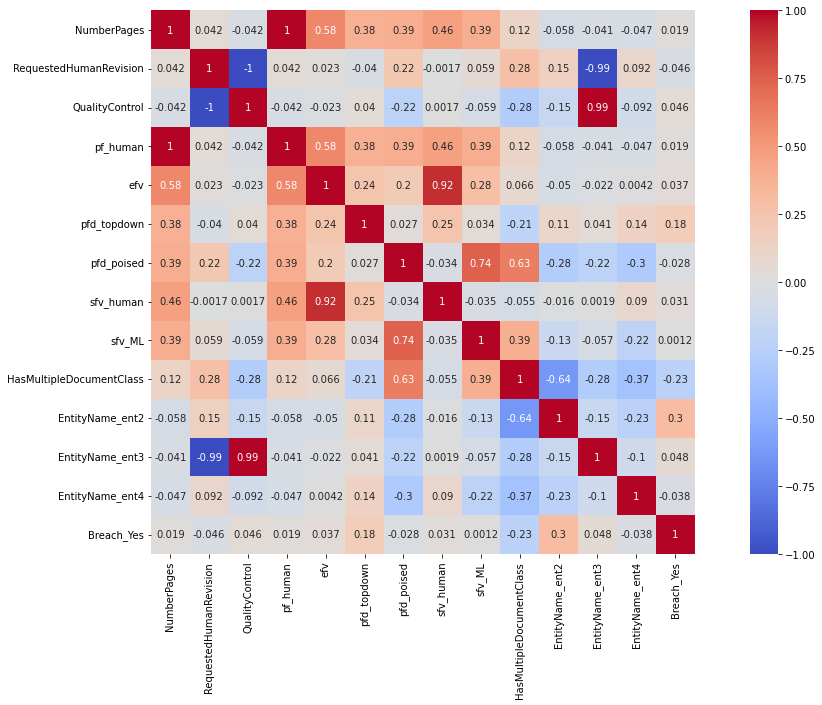

In [19]:
# Correlation Plot
import seaborn as sns
corr_mat=model_df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='coolwarm')

In [47]:
# Split the dataset into train and test data.
X = model_df.drop(['Breach_Yes'], axis = 1)
y = model_df['Breach_Yes']

In [48]:
# Split the data into 7:3 ratio(70%-train data and 30%-test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [49]:
# Check the training data
X_train.head()

,NumberPages,RequestedHumanRevision,QualityControl,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,HasMultipleDocumentClass,EntityName_ent2,EntityName_ent3,EntityName_ent4
4584,1,1,0,1,5,0,1,1,5,0,1,0,0
34035,1,1,0,1,4,0,1,2,2,1,0,0,0
9081,1,1,0,1,5,0,2,1,5,0,1,0,0
12307,1,1,0,1,4,0,1,3,4,0,0,0,1
28546,2,1,0,2,6,0,4,0,6,2,0,0,0


In [23]:
# Check the test data
X_test.head()

,NumberPages,RequestedHumanRevision,QualityControl,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,HasMultipleDocumentClass,EntityName_ent2,EntityName_ent3,EntityName_ent4
28879,1,1,0,1,6,0,2,0,6,2,0,0,0
30692,2,1,0,2,6,0,4,0,6,2,0,0,0
6915,2,1,0,2,6,0,4,1,5,2,0,0,0
4741,1,1,0,1,3,0,2,0,3,0,1,0,0
18809,1,1,0,1,6,0,2,0,6,2,0,0,0


### Dimensionality Reduction Using PCA

In [50]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
stndS = StandardScaler()
X_train = stndS.fit_transform(X_train)
X_test = stndS.transform(X_test)

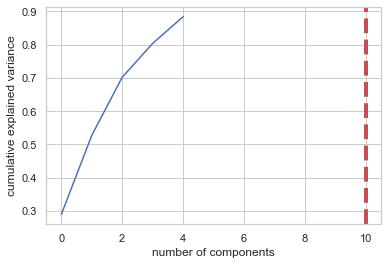

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.289773,0.289773
1,0.527412,0.237639
2,0.702210,0.174798
3,0.803934,0.101724
4,0.884287,0.080353


In [51]:
# Set the number of components (features) that we want to consider.
pca_test = PCA(n_components=5)
pca_test.fit(X_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [52]:
# Assign these recreated “reduced dimension" datasets to “X_train_scaled” and “X_test_scaled”
pca = PCA(n_components = 5)# extracted features we want to end up within our new dataset(2).
# Apply the above object to our training dataset using the fit method.
X_train_scaled = pca.fit_transform(X_train)
# Apply the PCA object to the test set only to transform this set
X_test_scaled = pca.transform(X_test)

In [27]:
# Display weights for each PCA component by creating a dataframe.
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=X.columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4
NumberPages,0.409822,0.246589,0.084296,-0.093816,-0.177482
RequestedHumanRevision,0.237620,-0.475258,0.194294,0.014249,0.005114
QualityControl,-0.237620,0.475258,-0.194294,-0.014249,-0.005114
pf_human,0.409822,0.246589,0.084296,-0.093816,-0.177482
efv,0.345800,0.257617,0.201696,0.147498,0.385671
pfd_topdown,0.132544,0.186844,0.267317,-0.111090,-0.501343
pfd_poised,0.355190,-0.054584,-0.372847,-0.128974,-0.131680
sfv_human,0.251069,0.251509,0.315662,0.247361,0.462663
sfv_ML,0.309370,0.045999,-0.321158,-0.227231,-0.169548
HasMultipleDocumentClass,0.249995,-0.166986,-0.447642,0.244623,0.160113


<AxesSubplot:>

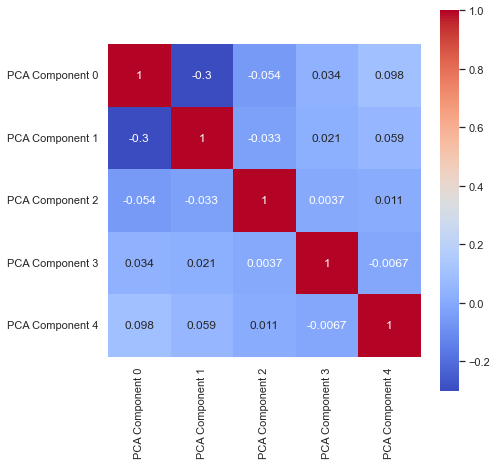

In [28]:
# Correlation Plot of the components
pca_test_df1=pca_test_df.T
corr_mat=pca_test_df1.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='coolwarm')

### Data Modelling

##### Logistic Regression

In [29]:
#calculate Variance Inflation Factor to check multicollinearity between independent variables
df_new = model_df.drop(['Breach_Yes'], axis = 1)

vif_scores = pd.DataFrame()

vif_scores["Attribute"] = df_new.columns

# calculating VIF for each feature

vif_scores["VIF Scores"] = [variance_inflation_factor(df_new.values, i) for i in range(len(df_new.columns))]

display(vif_scores)

,Attribute,VIF Scores
0,NumberPages,inf
1,RequestedHumanRevision,40.549901
2,QualityControl,77.398716
3,pf_human,inf
4,efv,17.312537
5,pfd_topdown,1.292041
6,pfd_poised,3.535241
7,sfv_human,15.530805
8,sfv_ML,4.224227
9,HasMultipleDocumentClass,12.825264


In [30]:
# Remove all the variables with VIF values greater than 5 to avoid multicollinearity between the independent variables
df_new = df_new.drop(['pf_human','QualityControl','RequestedHumanRevision','efv','pfd_poised'],1)

In [31]:
#calculate Variance Inflation Factor to check multicollinearity between independent variables

vif_scores = pd.DataFrame()

vif_scores["Attribute"] = df_new.columns

# calculating VIF for each feature

vif_scores["VIF Scores"] = [variance_inflation_factor(df_new.values, i) for i in range(len(df_new.columns))]

display(vif_scores)

,Attribute,VIF Scores
0,NumberPages,3.500277
1,pfd_topdown,1.323901
2,sfv_human,1.398812
3,sfv_ML,4.425801
4,HasMultipleDocumentClass,3.207957
5,EntityName_ent2,1.464261
6,EntityName_ent3,1.111248
7,EntityName_ent4,1.126566


In [34]:
# Consider the above independent variables and store them
X = df_new
y = model_df['Breach_Yes']

# Standardize the distribution of the independent variables
X_scaled = preprocessing.scale(X)
# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# Build the logistic model
logit_model=sm.Logit(y,X_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 52.926146
         Iterations 7
                             Results: Logit
Model:                 Logit             Pseudo R-squared:  inf         
Dependent Variable:    Breach_Yes        AIC:               4093429.9848
Date:                  2022-09-02 05:07  BIC:               4093498.4875
No. Observations:      38671             Log-Likelihood:    -2.0467e+06 
Df Model:              7                 LL-Null:           0.0000      
Df Residuals:          38663             LLR p-value:       1.0000      
Converged:             1.0000            Scale:             1.0000      
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
NumberPages              -0.0372   0.0163 -2.2817 

In [35]:
# Feature elimination using bachward selection technique
X_scaled = X_scaled.drop(['sfv_human'],1)

# Re-build the second model
logit_model=sm.Logit(y,X_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 52.919384
         Iterations 6
                             Results: Logit
Model:                 Logit             Pseudo R-squared:  inf         
Dependent Variable:    Breach_Yes        AIC:               4092904.9749
Date:                  2022-09-02 05:07  BIC:               4092964.9149
No. Observations:      38671             Log-Likelihood:    -2.0464e+06 
Df Model:              6                 LL-Null:           0.0000      
Df Residuals:          38664             LLR p-value:       1.0000      
Converged:             1.0000            Scale:             1.0000      
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
NumberPages              -0.0366   0.0159 -2.3076 

In [36]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.3,random_state=777)
x_train.head()

,NumberPages,pfd_topdown,sfv_ML,HasMultipleDocumentClass,EntityName_ent2,EntityName_ent3,EntityName_ent4
13855,0.269608,-0.194173,-0.057326,-1.098451,-0.581939,3.789172,-0.390381
37182,-0.356616,-0.194173,-0.706476,-1.098451,-0.581939,-0.263910,2.561599
18884,0.269608,-0.194173,0.591824,0.984886,-0.581939,-0.263910,-0.390381
22812,11.541641,-0.194173,-1.355625,-1.098451,-0.581939,-0.263910,2.561599
33633,-0.356616,-0.194173,-0.706476,-1.098451,-0.581939,-0.263910,2.561599


In [37]:
# Fit the model with training data
logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,y_train)

# Predicting using test data
y_pred = logistic_regression.predict(x_test)
log_acc=logistic_regression.score(x_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logistic_regression.score(x_test, y_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.8983
Mean Absolute Error: 24.97190139631098
Mean Squared Error: 0.10170660230994656
Root Mean Squared Error: 0.3189147257652844


<AxesSubplot:title={'center':'Feature Importance'}>

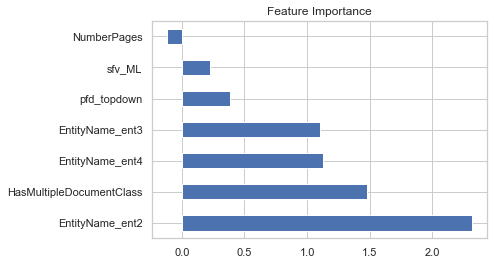

In [41]:
importance = logistic_regression.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance,  index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

<AxesSubplot:>

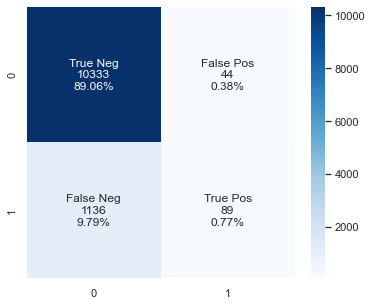

In [42]:
# Confusion Matrix of Logistic regression.
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix
fig = plt.gcf()
fig.set_size_inches(6, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')


In [44]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10377
           1       0.67      0.07      0.13      1225

    accuracy                           0.90     11602
   macro avg       0.79      0.53      0.54     11602
weighted avg       0.88      0.90      0.86     11602





##### K-Nearest Neighbors Classifier

Minimum error:- 0.09834511291156697 at K = 26


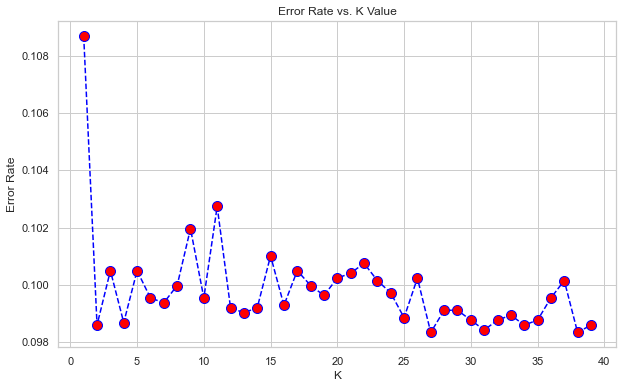

In [812]:
# Get the optimal k value with minimum error
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_i = knn.predict(X_test_scaled)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [814]:
# Train Model with the optimal k value
k = 26
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_scaled,y_train)
Pred_y = neigh.predict(X_test_scaled)
print("Accuracy of model at K=26 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=26 is 0.8997586622996036


In [815]:
# Make predictions on the model using test data
y_test_knn=neigh.predict(X_test_scaled)

In [816]:
# Accuracy of the KNN model
Knn_test_acc=accuracy_score(y_test, y_test_knn) 
print(f'Accuracy Score: {Knn_test_acc}')

Accuracy Score: 0.8997586622996036


In [817]:
print('Accuracy of KNN classifier on test set: {:.4f}'.format(accuracy_score(y_test, y_test_knn)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_knn)))

Accuracy of KNN classifier on test set: 0.8998
Mean Absolute Error: 21.095414583692467
Mean Squared Error: 0.10024133770039648
Root Mean Squared Error: 0.3166091244743216


<AxesSubplot:>

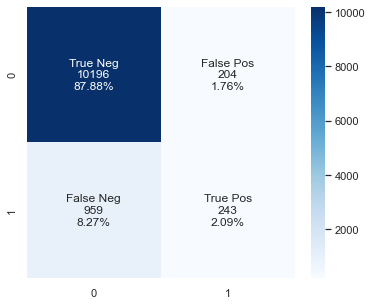

In [818]:
# Plotting Confusion matrix for KNN model
cnf_matrix = metrics.confusion_matrix(y_test,y_test_knn)
cnf_matrix
fig = plt.gcf()
fig.set_size_inches(6, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [819]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_knn))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10400
           1       0.54      0.20      0.29      1202

    accuracy                           0.90     11602
   macro avg       0.73      0.59      0.62     11602
weighted avg       0.88      0.90      0.88     11602





##### Decision Tree Classifier

In [820]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

In [821]:
# Train Decision Tree Classifer with train data
clf = clf.fit(X_train_scaled,y_train)

In [822]:
# Make predictions on the model using test data
y_test_pred = clf.predict(X_test_scaled)                                  

In [823]:
# Accuracy of the decision tree model
Dcst_test_acc = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score: {Dcst_test_acc}') 

Accuracy Score: 0.9004481985864506


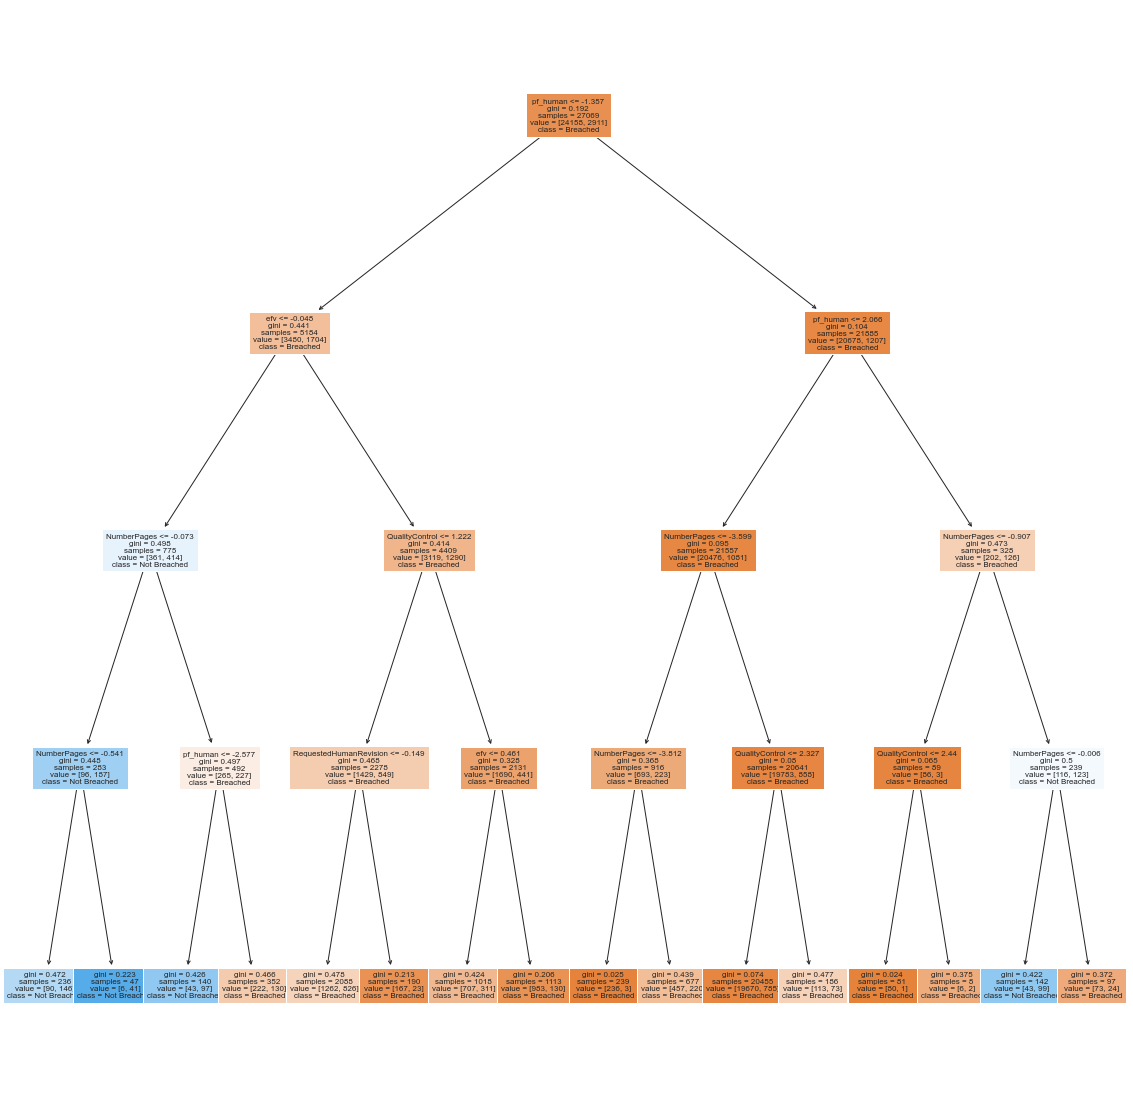

array([0.15565383, 0.02287726, 0.09371467, 0.62769802, 0.10005622])

In [824]:
# Plot decision tree
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Breached","Not Breached"],filled=True,fontsize=8)
plt.show()

importance = clf.feature_importances_
importance

In [825]:
# Accuracy of decision tree model
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.9004481985864506


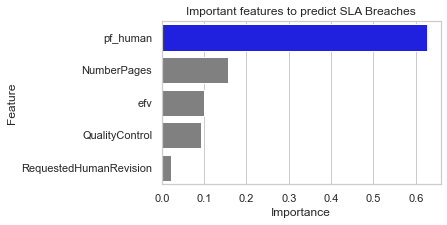

,Feature,Importance
0,pf_human,0.627698
1,NumberPages,0.155654
2,efv,0.100056
3,QualityControl,0.093715
4,RequestedHumanRevision,0.022877


In [826]:
# Plot to show feature importance
feat_dict= {}
for col, val in sorted(zip(X.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(5,3))
clrs = ['grey' if (x < max(values)) else 'blue' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict SLA Breaches')
plt.show()
feat_df

In [827]:
print('Accuracy of Decision Tree classifier on test set: {:.4f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Accuracy of Decision Tree classifier on test set: 0.9004
Mean Absolute Error: 23.590501637648682
Mean Squared Error: 0.09955180141354938
Root Mean Squared Error: 0.31551830598801933


<AxesSubplot:>

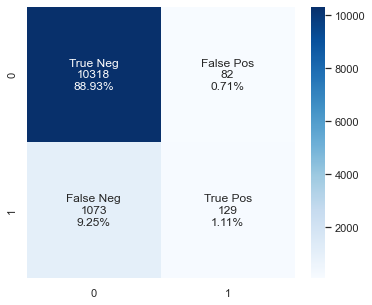

In [828]:
# Plotting Confusion matrix for decision tree
cnf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
cnf_matrix
fig = plt.gcf()
fig.set_size_inches(6, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [829]:
# Classification Report of decision tree model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10400
           1       0.61      0.11      0.18      1202

    accuracy                           0.90     11602
   macro avg       0.76      0.55      0.56     11602
weighted avg       0.88      0.90      0.87     11602



##### SVM Classifier

In [830]:
# Build a svm classifier(linear kernel)
svm = svm.SVC(kernel='linear')

In [831]:
#Train the model using the training set
svm.fit(X_train_scaled, y_train) 
#logreg.fit(X_train, y_train)


SVC(kernel='linear')

In [832]:
#Predict the response for test dataset
y_test_pred = svm.predict(X_test_scaled)
svm_acc = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:",svm_acc)

Accuracy: 0.8963971729012239


In [833]:
print('Accuracy of SVM classifier on test set: {:.4f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Accuracy of SVM classifier on test set: 0.8964
Mean Absolute Error: 26.418720910187897
Mean Squared Error: 0.10360282709877608
Root Mean Squared Error: 0.3218739304429237


<AxesSubplot:>

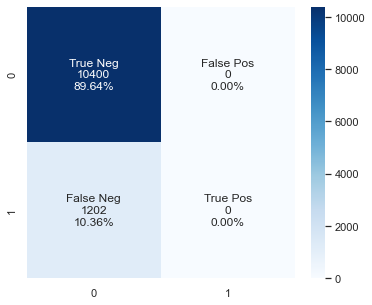

In [834]:
# Confusion Matrix of SVM Classifier
cnf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
cnf_matrix
fig = plt.gcf()
fig.set_size_inches(6, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [835]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10400
           1       0.00      0.00      0.00      1202

    accuracy                           0.90     11602
   macro avg       0.45      0.50      0.47     11602
weighted avg       0.80      0.90      0.85     11602





##### Naive Bayes Classifier

In [53]:
# Build and fit the Naive Bayes model with training data
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test_scaled)

In [54]:
# Compare actual response values (y_test) with predicted response values (y_pred)
naive_acc= metrics.accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 85.32149629374246


In [55]:
print('Accuracy of SVM classifier on test set: {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of SVM classifier on test set: 0.8532
Mean Absolute Error: 22.630667126357526
Mean Squared Error: 0.14678503706257542
Root Mean Squared Error: 0.38312535424137023


<AxesSubplot:>

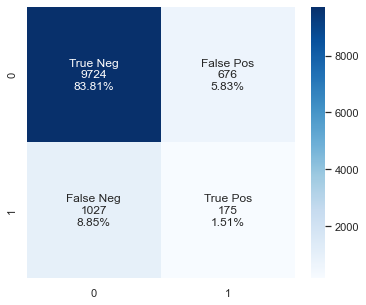

In [56]:
# Confusion Matrix of Naive Bayes Classifier
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix
fig = plt.gcf()
fig.set_size_inches(6, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [57]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10400
           1       0.21      0.15      0.17      1202

    accuracy                           0.85     11602
   macro avg       0.56      0.54      0.54     11602
weighted avg       0.83      0.85      0.84     11602





### Model Comparison

In [840]:
test_acc=[log_acc,Knn_test_acc,Dcst_test_acc,svm_acc,naive_acc]

In [841]:
col={'Test Acc':test_acc}
models=['Logistic Regression','K-Nearest Neighbors','Decision Tree','SVM','Naive Bayes']
acc_df = pd.DataFrame(data=col,index=models)
acc_df

,Test Acc
Logistic Regression,0.898293
K-Nearest Neighbors,0.899759
Decision Tree,0.900448
SVM,0.896397
Naive Bayes,0.853215


<AxesSubplot:title={'center':'Model Comaprison based on Accuracy'}>

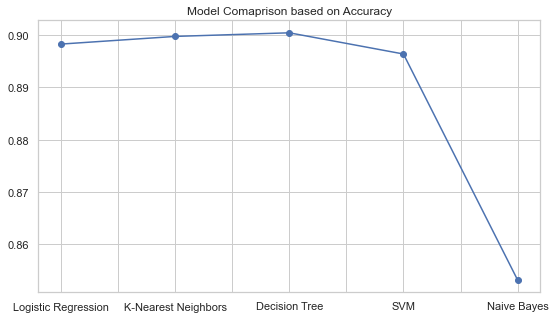

In [842]:
# Compare the accuracies of models
acc_df.plot(kind='line',legend=False,title='Model Comaprison based on Accuracy',figsize=(9, 5),marker='o') 